In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [58]:
# Load the dataset
file_path = "chennai-ground-water-levels-2023_removedsubt.csv"  # Replace with actual file path
df = pd.read_csv(file_path)
df.head()

,S.No.,Area No.,Dept No.,Location,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1.0,I,1,Kathivakkam,1.48,1.520,1.462,1.50,1.53,1.554,1.688,1.599,1.610,1.53,1.29,1.38
1,2.0,I,2,Kathivakkam,3.26,3.293,3.310,3.36,3.36,3.382,3.416,3.459,3.470,3.48,3.35,3.268
2,3.0,I,3,Ernavoor,2.01,2.236,2.244,2.24,2.14,2.166,2.231,2.51,2.264,2.24,1.82,1.91
3,4.0,I,4,Sadaiyankuppam,3.67,3.745,3.661,3.66,3.65,3.638,3.808,4.01,3.646,3.67,3.27,3.125
4,5.0,I,5,Kamadhenu Nagar,3.45,3.492,3.439,3.31,3.41,3.151,3.499,3.28,3.393,3.2,3.07,3.157


In [59]:
# Filter out rows where 'Dept No.' is missing or null
df_filtered = df[df['Dept No.'].notna() & (df['Dept No.'] != '')]

In [60]:
# Columns for monthly groundwater levels
months = ["Jan ", "Feb", "Mar", "Apr ", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_filtered = df[["Location"] + months]

In [61]:
# Convert monthly values to numeric (handling errors if any)
df_filtered[months] = df_filtered[months].apply(pd.to_numeric, errors='coerce')

C:\Users\rumma\AppData\Local\Temp\ipykernel_2096\1142407886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[months] = df_filtered[months].apply(pd.to_numeric, errors='coerce')


In [62]:
# Normalize groundwater levels across all wards
scaler = MinMaxScaler()
groundwater_normalized = scaler.fit_transform(df_filtered[months])

In [63]:
# Calculate the yearly average groundwater level for each ward
df_filtered['Yearly Average'] = df_filtered[months].mean(axis=1)

C:\Users\rumma\AppData\Local\Temp\ipykernel_2096\3915955505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Yearly Average'] = df_filtered[months].mean(axis=1)


In [64]:
# Normalize Yearly Average groundwater levels for stress index calculation
yearly_avg_normalized = scaler.fit_transform(df_filtered[['Yearly Average']])

In [65]:
# Assuming additional data such as population density (for illustration)
# For this example, let's add a random population density column
np.random.seed(42)
df_filtered['Population Density'] = np.random.randint(1000, 5000, size=len(df_filtered))

C:\Users\rumma\AppData\Local\Temp\ipykernel_2096\3732840219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Population Density'] = np.random.randint(1000, 5000, size=len(df_filtered))


In [66]:
# Normalize population density
pop_density_normalized = scaler.fit_transform(df_filtered[['Population Density']])

In [67]:

# Assume a uniform weight distribution for simplicity
weights = {'Groundwater': 0.6, 'Population Density': 0.4}

In [68]:
# Calculate the Groundwater Stress Index (GSI)
df_filtered['GSI'] = (weights['Groundwater'] * yearly_avg_normalized.flatten()) + (weights['Population Density'] * pop_density_normalized.flatten())


In [69]:
# Sort wards by Groundwater Stress Index (GSI)
df_filtered = df_filtered.sort_values(by='GSI', ascending=False)

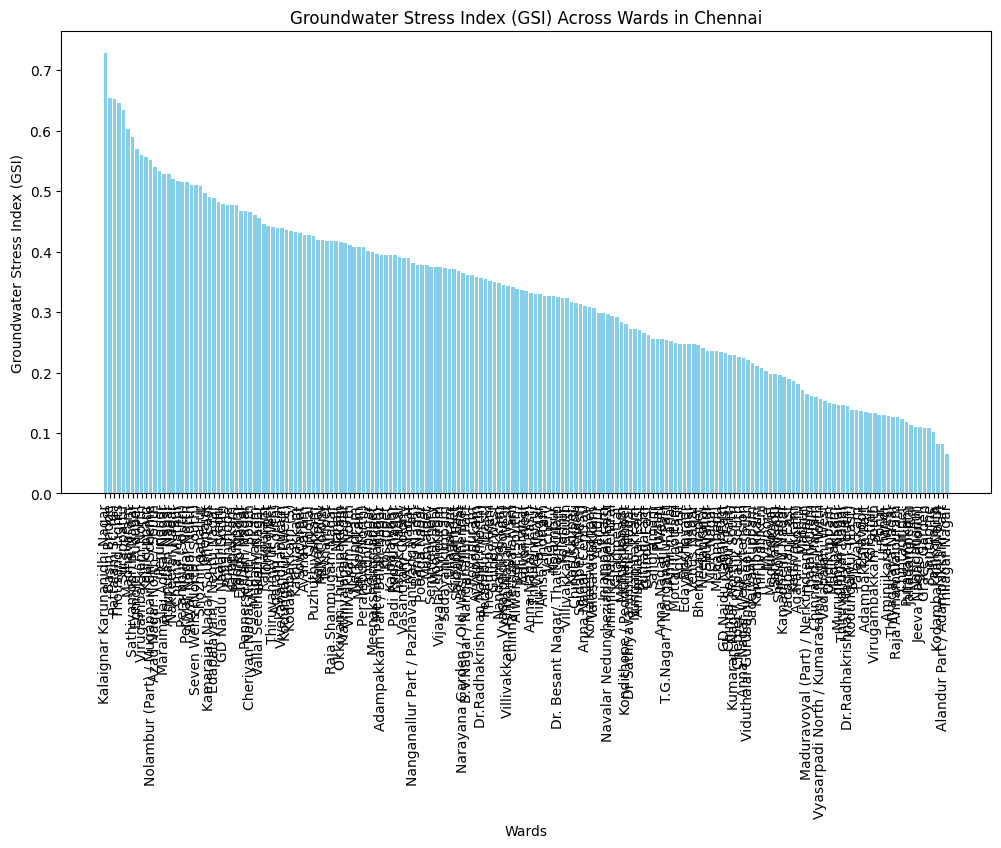

In [70]:
# Plotting Groundwater Stress Index
plt.figure(figsize=(12, 6))
plt.bar(df_filtered['Location'], df_filtered['GSI'], color='skyblue')
plt.xlabel('Wards')
plt.ylabel('Groundwater Stress Index (GSI)')
plt.title('Groundwater Stress Index (GSI) Across Wards in Chennai')
plt.xticks(rotation=90)
plt.show()

In [71]:
df_filtered

,Location,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Yearly Average,Population Density,GSI
137,Kalaignar Karunanidhi Nagar,15.88,16.508,15.925,16.34,17.56,14.205,14.960,12.043,10.626,12.616,8.96,10.550,13.847750,4910,0.727461
52,Basin Bridge,24.83,NaN,NaN,24.83,24.83,24.980,25.610,24.610,23.500,NaN,NaN,NaN,24.741429,1562,0.654481
75,Pattalam SC (G),14.55,14.980,14.860,14.55,14.55,14.680,15.690,14.650,14.660,14.550,14.55,NaN,14.751818,3945,0.652205
110,Thousand Lights,11.15,11.933,12.256,13.21,13.45,13.541,13.917,13.758,13.968,13.698,12.67,10.420,12.830917,4342,0.645601
23,Surappattu,6.53,11.021,14.589,19.46,21.29,21.776,23.322,20.928,18.034,20.558,15.68,2.363,16.295917,3391,0.633860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Valasaravakkam,2.59,2.996,2.455,3.13,3.32,3.125,3.443,3.250,2.355,2.479,0.64,1.670,2.621083,1391,0.100824
130,Kodambakkam North,1.69,1.869,1.508,1.93,2.15,1.730,1.754,1.051,1.010,1.133,0.26,1.160,1.437083,1492,0.082282
160,Alandur Part / Adampakkam Part,2.78,2.533,2.840,2.49,4.52,2.450,2.381,2.499,2.421,2.060,1.76,2.750,2.623667,1200,0.081652
186,Madipakkam,0.84,1.322,1.429,1.86,2.38,1.836,2.129,0.901,0.797,1.074,0.22,0.490,1.273167,1397,0.068740


In [72]:
# Display the wards with highest groundwater stress
print("\nTop 5 Wards with the Highest Groundwater Stress Index:")
print(df_filtered[['Location', 'GSI']].head())


Top 5 Wards with the Highest Groundwater Stress Index:
                        Location       GSI
137  Kalaignar Karunanidhi Nagar  0.727461
52                  Basin Bridge  0.654481
75               Pattalam SC (G)  0.652205
110              Thousand Lights  0.645601
23                    Surappattu  0.633860


In [73]:
df_filtered.head()

,Location,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Yearly Average,Population Density,GSI
137,Kalaignar Karunanidhi Nagar,15.88,16.508,15.925,16.34,17.56,14.205,14.960,12.043,10.626,12.616,8.96,10.550,13.847750,4910,0.727461
52,Basin Bridge,24.83,NaN,NaN,24.83,24.83,24.980,25.610,24.610,23.500,NaN,NaN,NaN,24.741429,1562,0.654481
75,Pattalam SC (G),14.55,14.980,14.860,14.55,14.55,14.680,15.690,14.650,14.660,14.550,14.55,NaN,14.751818,3945,0.652205
110,Thousand Lights,11.15,11.933,12.256,13.21,13.45,13.541,13.917,13.758,13.968,13.698,12.67,10.420,12.830917,4342,0.645601
23,Surappattu,6.53,11.021,14.589,19.46,21.29,21.776,23.322,20.928,18.034,20.558,15.68,2.363,16.295917,3391,0.633860
